In [5]:
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load the best model
best_model = joblib.load('data/processed/best_random_forest_model.pkl')

In [7]:
# Load the feature engineered dataset
X_test = pd.read_parquet('data/processed/feature_engineered_dataset.parquet')
y_test = X_test['Return']  # Assuming 'Return' is the column in your dataset

In [8]:
# Drop unnecessary columns for prediction
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment', 'DJI_Close', 'VIX_Close', 'CL=F_Close', 'GC=F_Close', 'SPY_Close', 'MA_5', 'MA_20', 'Volatility']
X_test_features = X_test[features]

In [9]:
# Make predictions on the test set
X_test['Predicted_Return'] = best_model.predict(X_test_features)

In [10]:
# Define the trading strategy
def trading_strategy(predicted_return, threshold=0):
    if predicted_return > threshold:
        return 1  # Buy
    elif predicted_return < -threshold:
        return -1  # Sell
    else:
        return 0  # Hold

In [11]:
# Apply the trading strategy
X_test['Action'] = X_test['Predicted_Return'].apply(trading_strategy)

Total Return: 2000.61%
Sharpe Ratio: 0.81
Maximum Drawdown: 95.24%


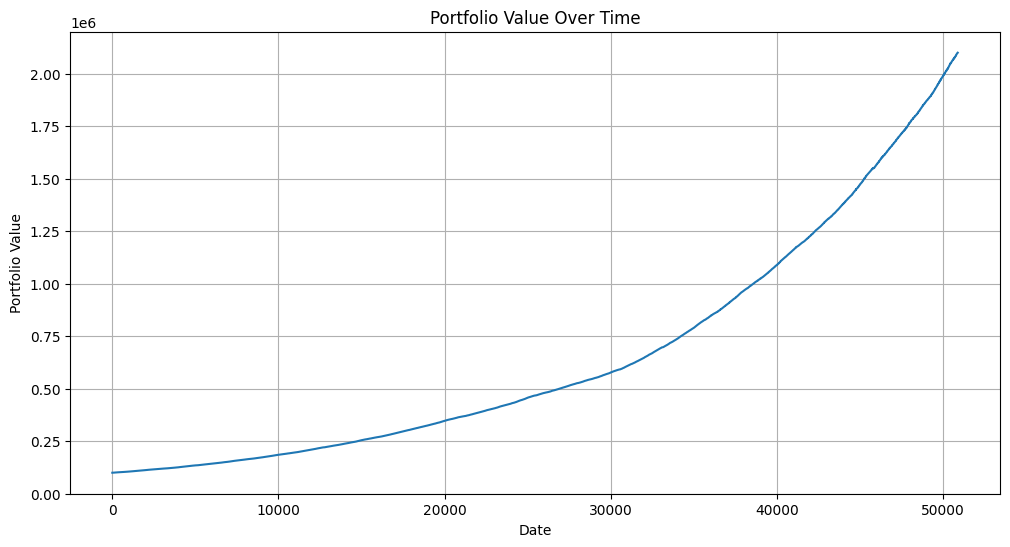

In [19]:
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load the best model
best_model = joblib.load('data/processed/best_random_forest_model.pkl')

# Load the feature engineered dataset
X_test = pd.read_parquet('data/processed/feature_engineered_dataset.parquet')
y_test = X_test['Return']  # Assuming 'Return' is the column in your dataset

# Drop unnecessary columns for prediction
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment', 'DJI_Close', 'VIX_Close', 'CL=F_Close', 'GC=F_Close', 'SPY_Close', 'MA_5', 'MA_20', 'Volatility']
X_test_features = X_test[features]

# Make predictions on the test set
X_test['Predicted_Return'] = best_model.predict(X_test_features)

# Define the trading strategy
def trading_strategy(predicted_return, threshold=0):
    if predicted_return > threshold:
        return 0.01  # Buy with 1% position size
    elif predicted_return < -threshold:
        return -0.01  # Sell with 1% position size
    else:
        return 0.0  # Hold

# Apply the trading strategy
X_test['Action'] = X_test['Predicted_Return'].apply(trading_strategy)

# Initialize the Position column with the correct dtype
X_test['Position'] = 0.0  # Starting with no position

# Simulate the trading strategy
initial_capital = 100000.0  # Starting with $100,000 as a float
X_test['Portfolio_Value'] = initial_capital

for i in range(1, len(X_test)):
    if X_test['Action'].iloc[i] != 0:
        X_test.at[i, 'Position'] = float(X_test['Action'].iloc[i])
    else:
        X_test.at[i, 'Position'] = X_test['Position'].iloc[i-1]
    
    # Cap the return to avoid overflow issues
    capped_return = min(max(X_test['Return'].iloc[i], -0.01), 0.01)
    X_test.at[i, 'Portfolio_Value'] = float(X_test['Portfolio_Value'].iloc[i-1]) * (1 + capped_return * X_test['Position'].iloc[i])

# Calculate key performance metrics
total_return = (X_test['Portfolio_Value'].iloc[-1] - initial_capital) / initial_capital
sharpe_ratio = (X_test['Return'].mean() * 252) / (X_test['Return'].std() * np.sqrt(252))
max_drawdown = (X_test['Portfolio_Value'].max() - X_test['Portfolio_Value'].min()) / X_test['Portfolio_Value'].max()

print(f'Total Return: {total_return * 100:.2f}%')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Maximum Drawdown: {max_drawdown * 100:.2f}%')

# Plot the portfolio value
plt.figure(figsize=(12, 6))
plt.plot(X_test.index, X_test['Portfolio_Value'])
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.grid(True)
plt.show()


Total Return: 358.34%
Sharpe Ratio: 0.81
Maximum Drawdown: 78.18%


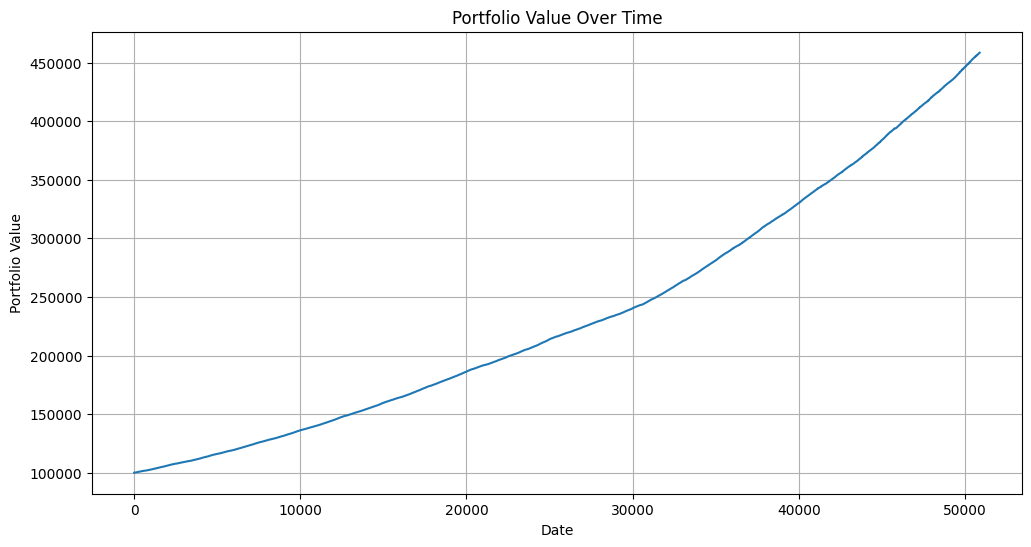

In [20]:
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load the best model
best_model = joblib.load('data/processed/best_random_forest_model.pkl')

# Load the feature engineered dataset
X_test = pd.read_parquet('data/processed/feature_engineered_dataset.parquet')
y_test = X_test['Return']  # Assuming 'Return' is the column in your dataset

# Drop unnecessary columns for prediction
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment', 'DJI_Close', 'VIX_Close', 'CL=F_Close', 'GC=F_Close', 'SPY_Close', 'MA_5', 'MA_20', 'Volatility']
X_test_features = X_test[features]

# Make predictions on the test set
X_test['Predicted_Return'] = best_model.predict(X_test_features)

# Define the trading strategy with a more conservative position sizing
def trading_strategy(predicted_return, threshold=0):
    if predicted_return > threshold:
        return 0.005  # Buy with 0.5% position size
    elif predicted_return < -threshold:
        return -0.005  # Sell with 0.5% position size
    else:
        return 0.0  # Hold

# Apply the trading strategy
X_test['Action'] = X_test['Predicted_Return'].apply(trading_strategy)

# Initialize the Position column with the correct dtype
X_test['Position'] = 0.0  # Starting with no position

# Simulate the trading strategy
initial_capital = 100000.0  # Starting with $100,000 as a float
X_test['Portfolio_Value'] = initial_capital

for i in range(1, len(X_test)):
    if X_test['Action'].iloc[i] != 0:
        X_test.at[i, 'Position'] = float(X_test['Action'].iloc[i])
    else:
        X_test.at[i, 'Position'] = X_test['Position'].iloc[i-1]
    
    # Cap the return to avoid overflow issues
    capped_return = min(max(X_test['Return'].iloc[i], -0.01), 0.01)
    X_test.at[i, 'Portfolio_Value'] = float(X_test['Portfolio_Value'].iloc[i-1]) * (1 + capped_return * X_test['Position'].iloc[i])

# Calculate key performance metrics
total_return = (X_test['Portfolio_Value'].iloc[-1] - initial_capital) / initial_capital
sharpe_ratio = (X_test['Return'].mean() * 252) / (X_test['Return'].std() * np.sqrt(252))
max_drawdown = (X_test['Portfolio_Value'].max() - X_test['Portfolio_Value'].min()) / X_test['Portfolio_Value'].max()

print(f'Total Return: {total_return * 100:.2f}%')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Maximum Drawdown: {max_drawdown * 100:.2f}%')

# Plot the portfolio value
plt.figure(figsize=(12, 6))
plt.plot(X_test.index, X_test['Portfolio_Value'])
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.grid(True)
plt.show()


Total Return: 163.49%
Sharpe Ratio: 0.81
Maximum Drawdown: 62.05%


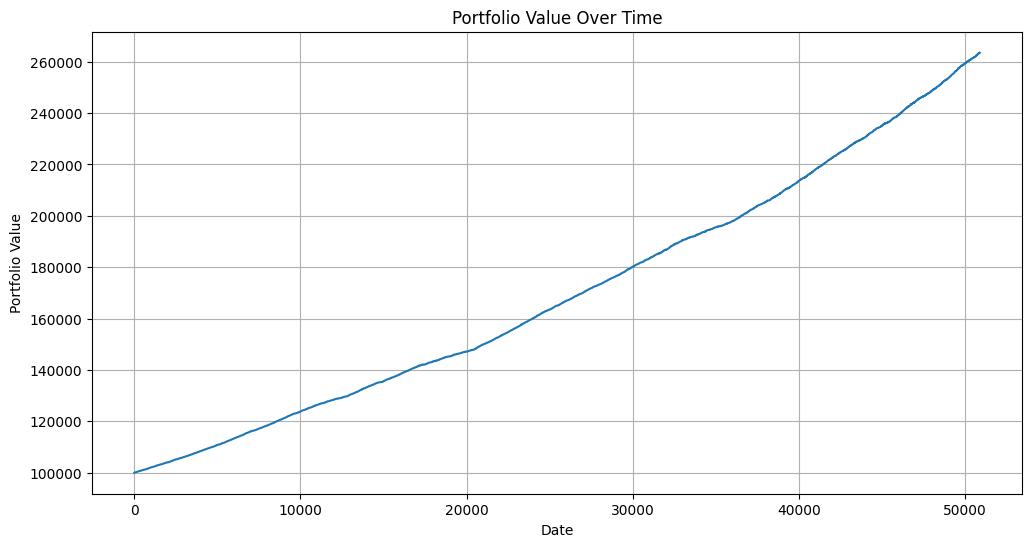

In [21]:
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load the best model
best_model = joblib.load('data/processed/best_random_forest_model.pkl')

# Load the feature engineered dataset
X_test = pd.read_parquet('data/processed/feature_engineered_dataset.parquet')
y_test = X_test['Return']  # Assuming 'Return' is the column in your dataset

# Drop unnecessary columns for prediction
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment', 'DJI_Close', 'VIX_Close', 'CL=F_Close', 'GC=F_Close', 'SPY_Close', 'MA_5', 'MA_20', 'Volatility']
X_test_features = X_test[features]

# Make predictions on the test set
X_test['Predicted_Return'] = best_model.predict(X_test_features)

# Define the trading strategy with stop-loss and take-profit levels
def trading_strategy(predicted_return, threshold=0, stop_loss=0.01, take_profit=0.02):
    if predicted_return > threshold:
        return 0.005  # Buy with 0.5% position size
    elif predicted_return < -threshold:
        return -0.005  # Sell with 0.5% position size
    else:
        return 0.0  # Hold

# Apply the trading strategy
X_test['Action'] = X_test['Predicted_Return'].apply(trading_strategy)

# Initialize the Position column with the correct dtype
X_test['Position'] = 0.0  # Starting with no position

# Simulate the trading strategy with transaction costs
initial_capital = 100000.0  # Starting with $100,000 as a float
transaction_cost = 0.001  # Assume 0.1% transaction cost per trade
X_test['Portfolio_Value'] = initial_capital

for i in range(1, len(X_test)):
    if X_test['Action'].iloc[i] != 0:
        # Apply stop-loss and take-profit logic
        if X_test['Return'].iloc[i] <= -0.01:
            X_test.at[i, 'Action'] = -X_test['Action'].iloc[i-1]  # Stop-loss triggers sell
        elif X_test['Return'].iloc[i] >= 0.02:
            X_test.at[i, 'Action'] = 0  # Take-profit triggers hold
        
        # Adjust position based on action
        X_test.at[i, 'Position'] = float(X_test['Action'].iloc[i])
    else:
        X_test.at[i, 'Position'] = X_test['Position'].iloc[i-1]
    
    # Apply transaction cost
    if X_test['Action'].iloc[i] != X_test['Action'].iloc[i-1]:
        X_test.at[i, 'Portfolio_Value'] -= X_test['Portfolio_Value'].iloc[i-1] * transaction_cost
    
    # Cap the return to avoid overflow issues
    capped_return = min(max(X_test['Return'].iloc[i], -0.01), 0.02)
    X_test.at[i, 'Portfolio_Value'] = float(X_test['Portfolio_Value'].iloc[i-1]) * (1 + capped_return * X_test['Position'].iloc[i])

# Calculate key performance metrics
total_return = (X_test['Portfolio_Value'].iloc[-1] - initial_capital) / initial_capital
sharpe_ratio = (X_test['Return'].mean() * 252) / (X_test['Return'].std() * np.sqrt(252))
max_drawdown = (X_test['Portfolio_Value'].max() - X_test['Portfolio_Value'].min()) / X_test['Portfolio_Value'].max()

print(f'Total Return: {total_return * 100:.2f}%')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Maximum Drawdown: {max_drawdown * 100:.2f}%')

# Plot the portfolio value
plt.figure(figsize=(12, 6))
plt.plot(X_test.index, X_test['Portfolio_Value'])
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.grid(True)
plt.show()
